In [6]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import numpy as n
# source text
data = """ Jack and Jill went up the hill\n
		To fetch a pail of water\n
		Jack fell down and broke his crown\n
		And Jill came tumbling after\n """
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# create word -> word sequences
sequences = list()
for i in range(1, len(encoded)):
	sequence = encoded[i-1:i+1]
	sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
# split into X and y elements
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)
# define model
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],run_eagerly=True)
# fit network
model.fit(X, y, epochs=500, verbose=2)
# evaluate
in_text = 'Jill'
print(in_text)
encoded = tokenizer.texts_to_sequences([in_text])[0]
encoded = np.array(encoded)
yhat = model.predict(encoded, verbose=0)
yhat = np.argmax(yhat,axis=1)
for word, index in tokenizer.word_index.items():
	if index == (yhat):
		print(word)

Vocabulary Size: 22
Total Sequences: 24
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 10)             220       
                                                                 
 lstm_1 (LSTM)               (None, 50)                12200     
                                                                 
 dense_1 (Dense)             (None, 22)                1122      
                                                                 
Total params: 13542 (52.90 KB)
Trainable params: 13542 (52.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/500
1/1 - 0s - loss: 3.0915 - accuracy: 0.0000e+00 - 83ms/epoch - 83ms/step
Epoch 2/500
1/1 - 0s - loss: 3.0907 - accuracy: 0.0417 - 54ms/epoch - 54ms/step
Epoch 3/500
1/1 - 0s - loss: 3.0900 - accuracy: 0.0417 - 54ms/epoch - 54m

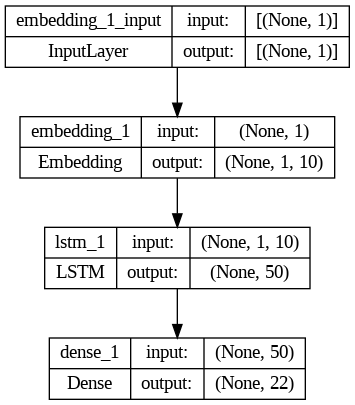

In [7]:
from keras.utils import plot_model

plot_model(model, to_file='model_structure.png', show_shapes=True, show_layer_names=True)


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
import numpy as n

In [2]:
# source text
data = """ Jack and Jill went up the hill\n
		To fetch a pail of water\n
		Jack fell down and broke his crown\n
		And Jill came tumbling after\n """
# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0]
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1
print('Vocabulary Size: %d' % vocab_size)
# create word -> word sequences
sequences = list()
for i in range(1, len(encoded)):
	sequence = encoded[i-1:i+1]
	sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))
# split into X and y elements
sequences = np.array(sequences)
X, y = sequences[:,0],sequences[:,1]
# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)

Vocabulary Size: 22
Total Sequences: 24


In [3]:
# define model
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense

model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(LSTM(50))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1, 10)             220       
                                                                 
 lstm (LSTM)                 (None, 50)                12200     
                                                                 
 dense (Dense)               (None, 22)                1122      
                                                                 
Total params: 13542 (52.90 KB)
Trainable params: 13542 (52.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [4]:
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'],run_eagerly=True)
# fit network
model.fit(X, y, epochs=500, verbose=2)

Epoch 1/500
1/1 - 0s - loss: 3.0918 - accuracy: 0.0417 - 236ms/epoch - 236ms/step
Epoch 2/500
1/1 - 0s - loss: 3.0910 - accuracy: 0.0417 - 48ms/epoch - 48ms/step
Epoch 3/500
1/1 - 0s - loss: 3.0902 - accuracy: 0.1250 - 45ms/epoch - 45ms/step
Epoch 4/500
1/1 - 0s - loss: 3.0894 - accuracy: 0.1250 - 42ms/epoch - 42ms/step
Epoch 5/500
1/1 - 0s - loss: 3.0886 - accuracy: 0.1250 - 40ms/epoch - 40ms/step
Epoch 6/500
1/1 - 0s - loss: 3.0879 - accuracy: 0.1250 - 40ms/epoch - 40ms/step
Epoch 7/500
1/1 - 0s - loss: 3.0871 - accuracy: 0.1250 - 57ms/epoch - 57ms/step
Epoch 8/500
1/1 - 0s - loss: 3.0863 - accuracy: 0.1250 - 40ms/epoch - 40ms/step
Epoch 9/500
1/1 - 0s - loss: 3.0855 - accuracy: 0.1250 - 43ms/epoch - 43ms/step
Epoch 10/500
1/1 - 0s - loss: 3.0847 - accuracy: 0.1250 - 43ms/epoch - 43ms/step
Epoch 11/500
1/1 - 0s - loss: 3.0839 - accuracy: 0.1250 - 41ms/epoch - 41ms/step
Epoch 12/500
1/1 - 0s - loss: 3.0831 - accuracy: 0.1250 - 40ms/epoch - 40ms/step
Epoch 13/500
1/1 - 0s - loss: 3.082

In [5]:
# evaluate
in_text = 'Jill'
print(in_text)
encoded = tokenizer.texts_to_sequences([in_text])[0]
encoded = np.array(encoded)
yhat = model.predict(encoded, verbose=0)
yhat = np.argmax(yhat,axis=1)
for word, index in tokenizer.word_index.items():
	if index == (yhat):
		print(word)

Jill
came
